# StarGAN-v2


In [1]:
%cd /home/aistudio/
!rm -r cuda-9.2
!rm -r data/cuda
!cp -r /usr/local/cuda-9.2 cuda-9.2
!chmod -R +w cuda-9.2

!unzip -d ./data/cuda ./data/data50936/cuda.zip
!cp ./data/cuda/lib64/* /home/aistudio/cuda-9.2/lib64/
!cp ./data/cuda/include/* /home/aistudio/cuda-9.2/include/

!echo "export LD_LIBRARY_PATH=/home/aistudio/cuda-9.2/lib64:\$LD_LIBRARY_PATH" >> .bashrc
!echo "export CUDA_HOME=/home/aistudio/cuda-9.2/:\$CUDA_HOME" >> .bashrc

/home/aistudio
rm: cannot remove 'cuda-9.2': No such file or directory
rm: cannot remove 'data/cuda': No such file or directory
Archive:  ./data/data50936/cuda.zip
   creating: ./data/cuda/lib64/
  inflating: ./data/cuda/lib64/libcudnn.so  
  inflating: ./data/cuda/lib64/libcudnn.so.7  
  inflating: ./data/cuda/lib64/libcudnn_static.a  
  inflating: ./data/cuda/lib64/libcudnn.so.7.6.2  
  inflating: ./data/cuda/.DS_Store   
   creating: ./data/cuda/include/
  inflating: ./data/cuda/include/cudnn.h  


## 安装依赖
- Munch
- paddlepaddle-gpu 1.8.3

In [2]:
!pip install Munch
!python3 -m pip install paddlepaddle-gpu==1.8.3.post97 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple/
Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 404.9MB 8.9MB/s eta 0:00:011    |█████▊                          | 72.1MB 8.3MB/s eta 0:00:41     |█████████                       | 113.2MB 9.6MB/s eta 0:00:31     |████████████▏                   | 153.5MB 11.1MB/s eta 0:00:23     |████████████████▊               | 211.7MB 8.9MB/s eta 0:00:22     |██████████████████▍             | 232.1MB 9.3MB/s eta 0:00:19     |███████████████████████         | 290.4MB 541kB/s eta 0:03:32     |██████████████████████████▊     | 338.0MB 15.5MB/s eta 0:00:05     |███████████████████████████▊    | 351.0MB 636kB/s eta 0:01:25     |█████████████████████████████▏  | 369.7MB 757kB/s eta 0:00:47     |██████████████████████████████▋ | 387.7MB 62.6MB/s eta 0:00:01
  Found existing installation: paddlepaddle-gpu 1.8.0.post97
    Uninstalling paddlepaddle-gpu-1.8.0.post97:
      Successfully uninstalled paddl

## 解压数据

In [1]:
!unzip /home/aistudio/data/data48884/data.zip -d /home/aistudio/work/stargan-v2-paddle-master/

## 小数据集测试代码

### train with develop small dataset

在终端运行：
```
bash run_dev.sh > log_dev.log
```

## 完整数据集训练

### train with whole celeba_hq dataset

在终端运行：
```
bash run.sh > log.log
```

或者同时运行下面两段以加快速度
```
nohup python main.py --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --batch_size 8 \
               --val_batch_size 8 \
               --num_outs_per_domain 4 \
               --num_domains 2 \
               --resume_iter 0 \
               --w_hpf 0 \
               --total_iters 10000 \
               --print_every 10 \
               --sample_every 100 \
               --save_every 1000 \
               --whichgpu 0 \
               --latent_dim 16 \
               --hidden_dim 512 \
               --style_dim 64 \
               --sample_dir expr_celeba_hq/samples \
               --checkpoint_dir expr_celeba_hq/checkpoints > log_celeba.log &
```

```
nohup python main.py --train_img_dir data/afhq/train \
               --val_img_dir data/afhq/val \
               --batch_size 8 \
               --val_batch_size 8 \
               --num_outs_per_domain 6 \
               --num_domains 3 \
               --resume_iter 0 \
               --w_hpf 0 \
               --total_iters 10000 \
               --print_every 10 \
               --sample_every 100 \
               --save_every 1000 \
               --whichgpu 0 \
               --latent_dim 16 \
               --hidden_dim 512 \
               --style_dim 64 \
               --sample_dir expr_afhq/samples \
               --checkpoint_dir expr_afhq/checkpoints > log_afhq.log &
```

## 训练结果图片

In [3]:
# 显示结果图像
%cd /home/aistudio/work/stargan-v2-paddle-master/
def show_results(root='expr', step=1, resize=None, showfile='reference'): 
    from PIL import Image
    from IPython.display import display

    if resize is None:
        resize = [200, 200]

    fname = root + '/samples/' + f'{step:6d}'.replace(' ', '0') + '_' + showfile + '.jpg'
    display(Image.open(fname).resize(resize))

/home/aistudio/work/stargan-v2-paddle-master


### 小样本训练结果

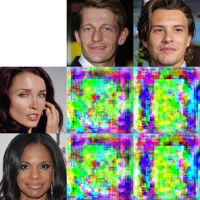

In [21]:
show_results(root='expr', step=1, resize=[200, 200], showfile='reference')

### 大样本训练结果
第100轮结果

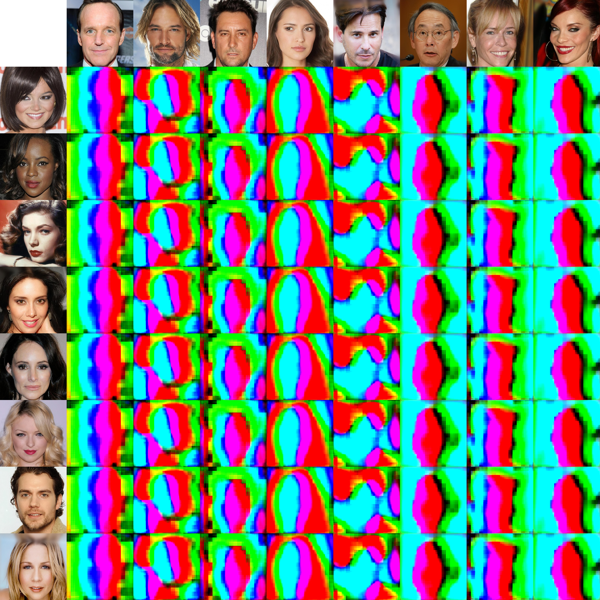

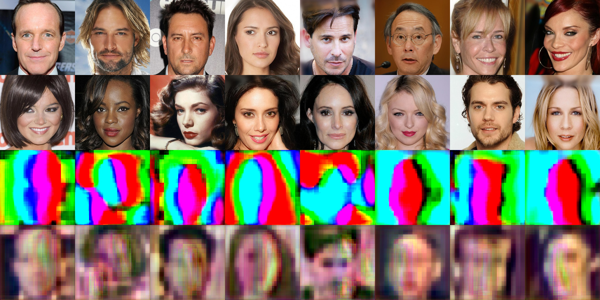

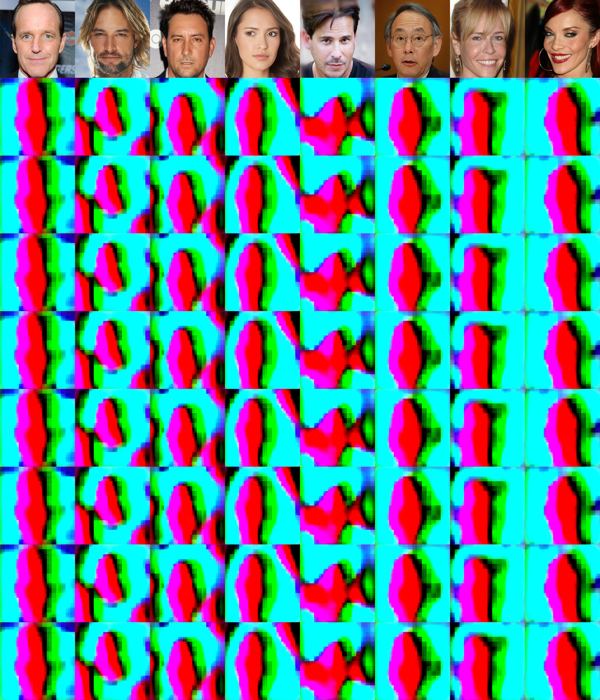

In [4]:
show_results(root='expr_celeba_hq', step=100, resize=[600, 600], showfile='reference')
print('\r\n')
show_results(root='expr_celeba_hq', step=100, resize=[600, 300], showfile='cycle_consistency')
print('\r\n')
show_results(root='expr_celeba_hq', step=100, resize=[600, 700], showfile='latent_psi_0.7')

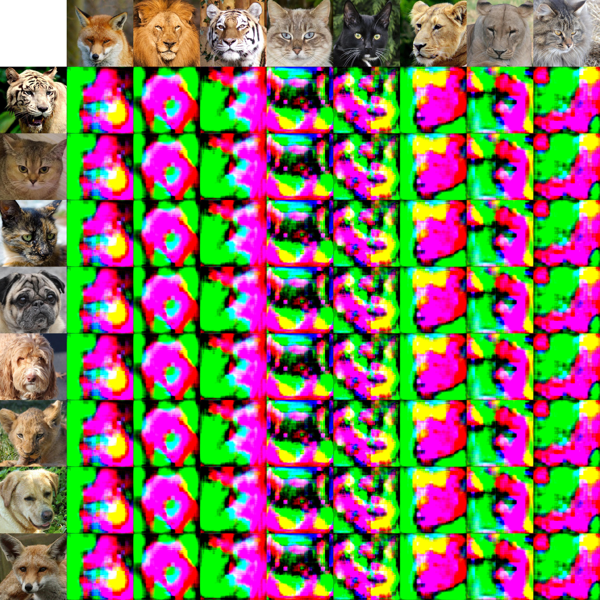

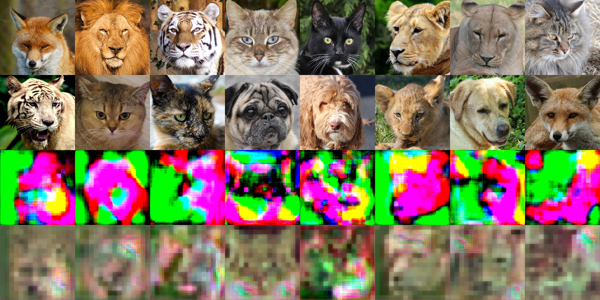

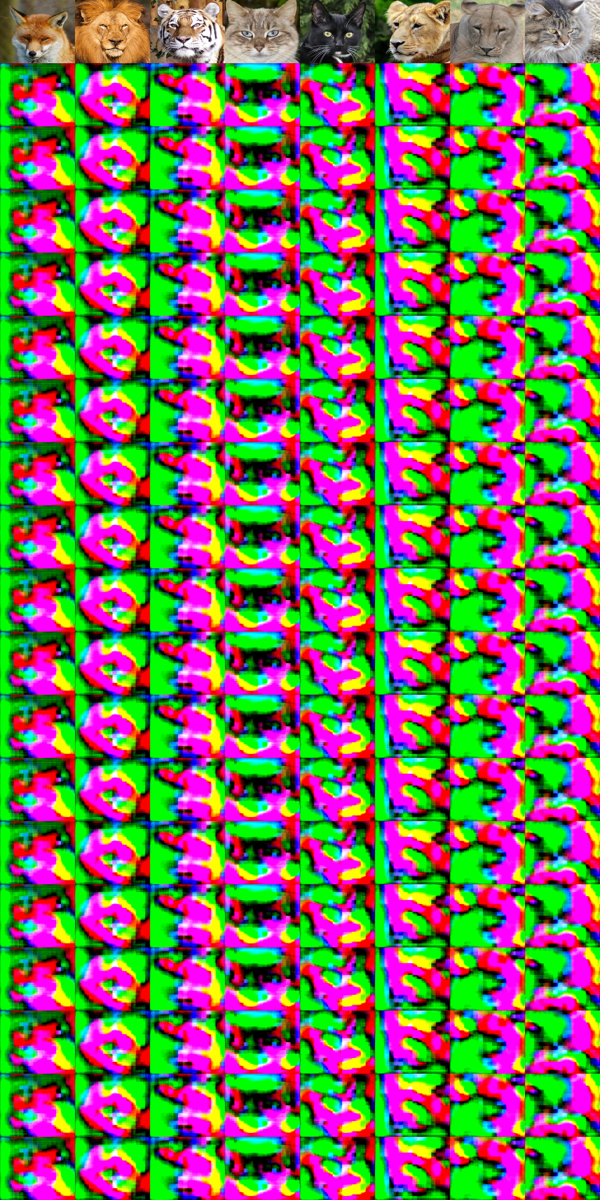

In [5]:
show_results(root='expr_afhq', step=100, resize=[600, 600], showfile='reference')
print('\r\n')
show_results(root='expr_afhq', step=100, resize=[600, 300], showfile='cycle_consistency')
print('\r\n')
show_results(root='expr_afhq', step=100, resize=[600, 1200], showfile='latent_psi_0.7')

### 大样本训练结果
第10000轮结果

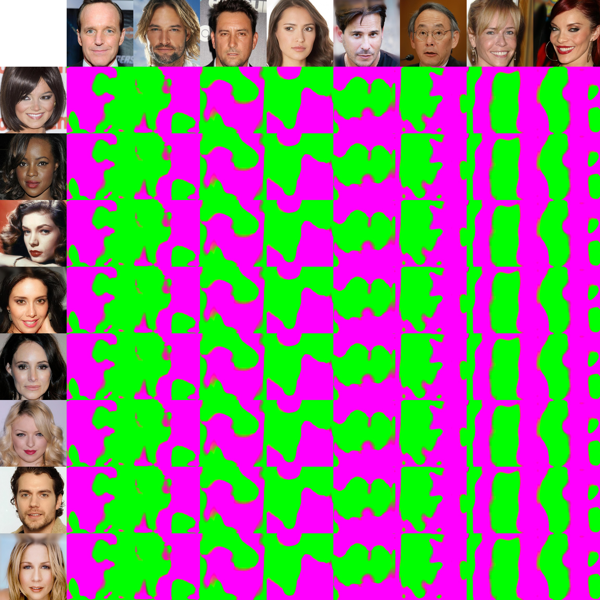

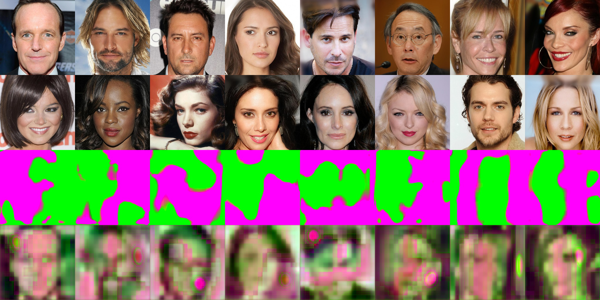

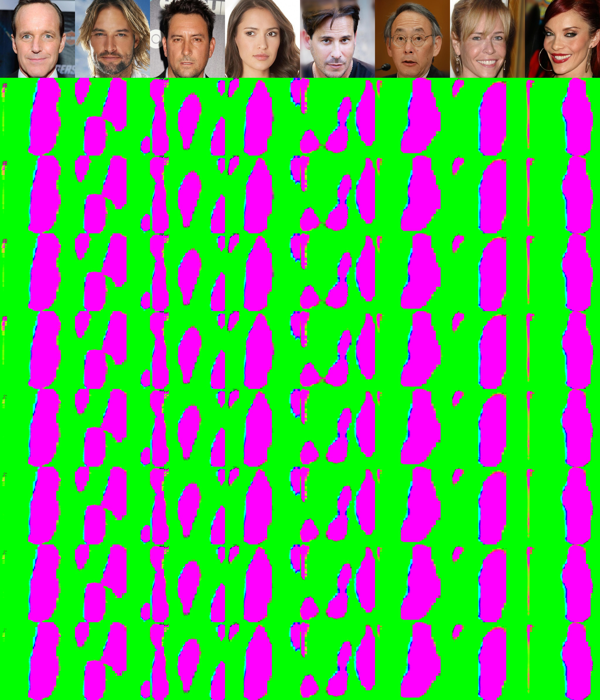

In [7]:
show_results(root='expr_celeba_hq', step=10000, resize=[600, 600], showfile='reference')
print('\r\n')
show_results(root='expr_celeba_hq', step=10000, resize=[600, 300], showfile='cycle_consistency')
print('\r\n')
show_results(root='expr_celeba_hq', step=10000, resize=[600, 700], showfile='latent_psi_0.7')

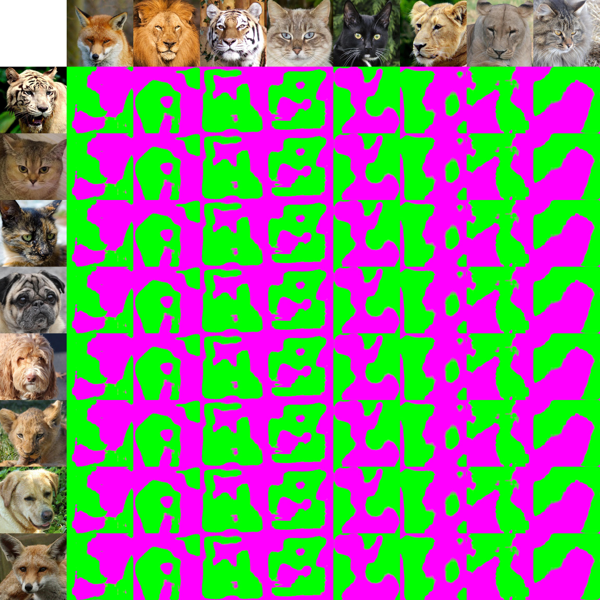

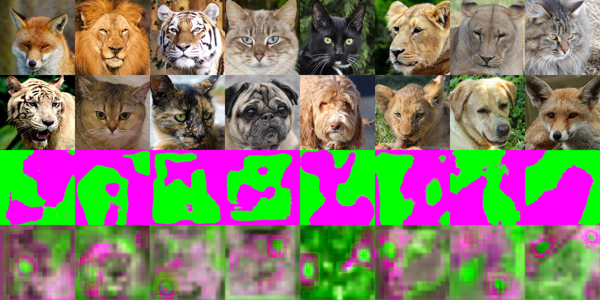

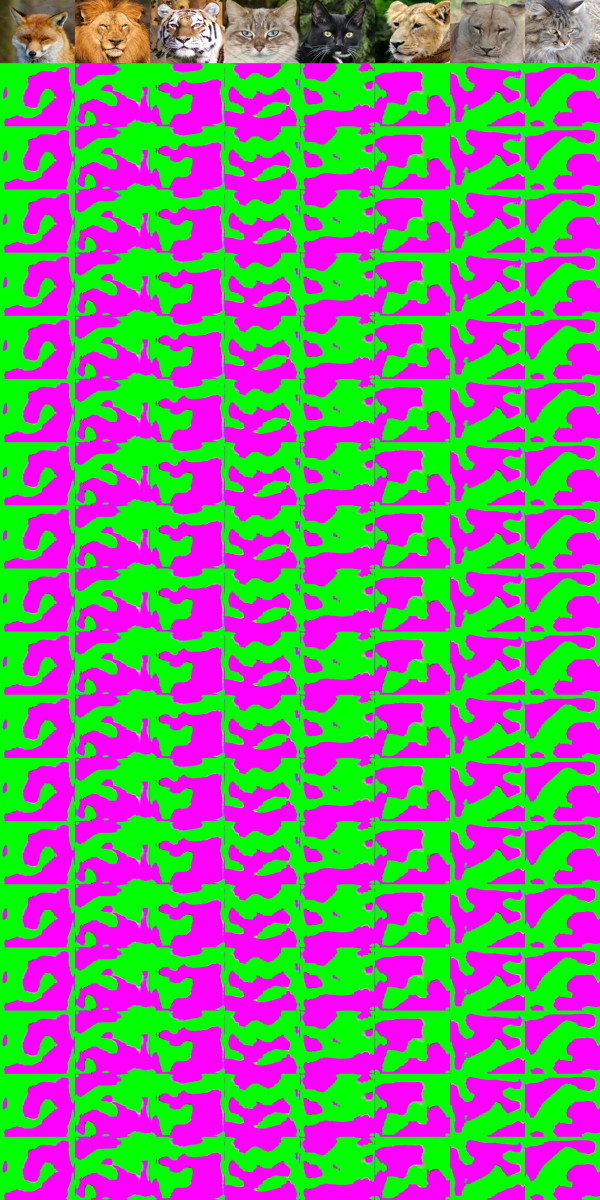

In [10]:
show_results(root='expr_afhq', step=10000, resize=[600, 600], showfile='reference')
print('\r\n')
show_results(root='expr_afhq', step=10000, resize=[600, 300], showfile='cycle_consistency')
print('\r\n')
show_results(root='expr_afhq', step=10000, resize=[600, 1200], showfile='latent_psi_0.7')

## 小结
模块方面仍有Kaiming初始化，Wing和r1_reg没有实现；另外，可能程序中间存在一些bug，目前训练的结果明显较差，还是需要做较多的修改。